In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized mann er
import random # library for random number generation
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # module to convert an add ress into latitude and longitude values
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1

*theese are the datas for my research to find the best place for Lang Lang. I have used Foursquare to find restourants in Milan, starting from La Scala Opera theater. Then I have clustered the datas, showing on the map wich places are in the nearby of the theatre and full of restourants*

In [3]:
CLIENT_ID = 'TZD4E14IJCRDMOPU2WIJ455ERYYTPHMS0RPSAJIIOQVTXD5K' # your Foursquare ID
CLIENT_SECRET = 'U2J4WDHKDKJXGURKRQHW3IIOF2EEU1GBAUSGFVSUKNPOIKKK' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: TZD4E14IJCRDMOPU2WIJ455ERYYTPHMS0RPSAJIIOQVTXD5K
CLIENT_SECRET:U2J4WDHKDKJXGURKRQHW3IIOF2EEU1GBAUSGFVSUKNPOIKKK


In [4]:
address = 'Piazza Paolo Ferrari, Milan, IT'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

45.4670179 9.1887546


In [5]:
search_query = 'restaurant'
radius = 5000
print(search_query + ' .... OK!')

restaurant .... OK!


In [6]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=TZD4E14IJCRDMOPU2WIJ455ERYYTPHMS0RPSAJIIOQVTXD5K&client_secret=U2J4WDHKDKJXGURKRQHW3IIOF2EEU1GBAUSGFVSUKNPOIKKK&ll=45.4670179,9.1887546&v=20180604&query=restaurant&radius=5000&limit=30'

In [7]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e8ae500df2774001c156f55'},
 'response': {'venues': [{'id': '4bf807ae92d19521ae265a1f',
    'name': 'Maio Restaurant',
    'location': {'address': 'Piazza del Duomo',
     'lat': 45.464874896086734,
     'lng': 9.191740729113803,
     'labeledLatLngs': [{'label': 'display',
       'lat': 45.464874896086734,
       'lng': 9.191740729113803}],
     'distance': 333,
     'postalCode': '20121',
     'cc': 'IT',
     'neighborhood': 'Duomo',
     'city': 'Milano',
     'state': 'Lombardia',
     'country': 'Italia',
     'formattedAddress': ['Piazza del Duomo',
      '20121 Milano Lombardia',
      'Italia']},
    'categories': [{'id': '4bf58dd8d48988d110941735',
      'name': 'Italian Restaurant',
      'pluralName': 'Italian Restaurants',
      'shortName': 'Italian',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1586160741',
    'hasPerk': False}

In [8]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",False,4bf807ae92d19521ae265a1f,Piazza del Duomo,IT,Milano,Italia,NaN,333,"[Piazza del Duomo, 20121 Milano Lombardia, Ita...","[{'label': 'display', 'lat': 45.46487489608673...",45.464875,9.191741,Duomo,20121,Lombardia,Maio Restaurant,v-1586160741,NaN
1,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",False,55bb8ff0498efc8d837137f3,Duomo Le Plaza,IT,Milano,Italia,NaN,178,"[Duomo Le Plaza, Milano Lombardia, Italia]","[{'label': 'display', 'lat': 45.465582, 'lng':...",45.465582,9.189778,NaN,NaN,Lombardia,Restaurant,v-1586160741,NaN
2,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",False,4c34d36ea0ced13a44d6186e,"Via San Vito, 7",IT,Milano,Italia,NaN,968,"[Via San Vito, 7, 20123 Milano Lombardia, Italia]","[{'label': 'display', 'lat': 45.459725, 'lng':...",45.459725,9.181989,NaN,20123,Lombardia,Japan Lounge - Restaurant & Drink,v-1586160741,NaN
3,"[{'id': '4bf58dd8d48988d143941735', 'name': 'B...",False,50ca02c1245f2d4aa8c2b6fe,Via Luigi Galvani 12,IT,Milano,Italia,Hilton Milan,2312,"[Via Luigi Galvani 12 (Hilton Milan), 20124 Mi...","[{'label': 'display', 'lat': 45.48624459007331...",45.486245,9.199966,NaN,20124,Lombardia,Pacific Milano Restaurant,v-1586160741,NaN
4,"[{'id': '4bf58dd8d48988d1c0941735', 'name': 'M...",False,4b058879f964a52009c822e3,Piazza della Repubblica 20,IT,Milano,Italia,NaN,1570,"[Piazza della Repubblica 20, 20124 Milano Lomb...","[{'label': 'display', 'lat': 45.47894809923819...",45.478948,9.199487,NaN,20124,Lombardia,PanEVO Restaurant,v-1586160741,NaN


In [9]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Maio Restaurant,Italian Restaurant,Piazza del Duomo,IT,Milano,Italia,NaN,333,"[Piazza del Duomo, 20121 Milano Lombardia, Ita...","[{'label': 'display', 'lat': 45.46487489608673...",45.464875,9.191741,Duomo,20121,Lombardia,4bf807ae92d19521ae265a1f
1,Restaurant,Café,Duomo Le Plaza,IT,Milano,Italia,NaN,178,"[Duomo Le Plaza, Milano Lombardia, Italia]","[{'label': 'display', 'lat': 45.465582, 'lng':...",45.465582,9.189778,NaN,NaN,Lombardia,55bb8ff0498efc8d837137f3
2,Japan Lounge - Restaurant & Drink,Sushi Restaurant,"Via San Vito, 7",IT,Milano,Italia,NaN,968,"[Via San Vito, 7, 20123 Milano Lombardia, Italia]","[{'label': 'display', 'lat': 45.459725, 'lng':...",45.459725,9.181989,NaN,20123,Lombardia,4c34d36ea0ced13a44d6186e
3,Pacific Milano Restaurant,Breakfast Spot,Via Luigi Galvani 12,IT,Milano,Italia,Hilton Milan,2312,"[Via Luigi Galvani 12 (Hilton Milan), 20124 Mi...","[{'label': 'display', 'lat': 45.48624459007331...",45.486245,9.199966,NaN,20124,Lombardia,50ca02c1245f2d4aa8c2b6fe
4,PanEVO Restaurant,Mediterranean Restaurant,Piazza della Repubblica 20,IT,Milano,Italia,NaN,1570,"[Piazza della Repubblica 20, 20124 Milano Lomb...","[{'label': 'display', 'lat': 45.47894809923819...",45.478948,9.199487,NaN,20124,Lombardia,4b058879f964a52009c822e3
5,James Beard American Restaurant at Seven Stars...,American Restaurant,NaN,IT,NaN,Italia,NaN,108,[Italia],"[{'label': 'display', 'lat': 45.46637065209568...",45.466371,9.189794,NaN,NaN,NaN,5546348c498e448ae1ea9278
6,Vikissimo Restaurant,Restaurant,via Silvio Pellico 8,IT,Milano,Italia,NaN,138,"[via Silvio Pellico 8, 20121 Milano Lombardia,...","[{'label': 'display', 'lat': 45.46583826149231...",45.465838,9.189337,NaN,20121,Lombardia,5caf3c450e3239002b767d8f
7,Ottagono Restaurant,Italian Restaurant,NaN,IT,NaN,Italia,NaN,182,[Italia],"[{'label': 'display', 'lat': 45.465609, 'lng':...",45.465609,9.189940,NaN,NaN,NaN,58cce52d9ab6631b5f13f314
8,Pavarotti Museum and Restaurant,Italian Restaurant,NaN,IT,NaN,Italia,NaN,215,[Italia],"[{'label': 'display', 'lat': 45.46523729914671...",45.465237,9.189843,NaN,NaN,NaN,5596c21e498ea6213a6c0fac
9,Italy Restaurant,Pizza Place,Via San Prospero 4,IT,Milano,Italia,NaN,255,"[Via San Prospero 4, 20121 Milano Lombardia, I...","[{'label': 'display', 'lat': 45.465891, 'lng':...",45.465891,9.185910,NaN,20121,Lombardia,588f2b56ac136914a643a65b


In [10]:
dataframe_filtered.name

0                                       Maio Restaurant
1                                            Restaurant
2                     Japan Lounge - Restaurant & Drink
3                             Pacific Milano Restaurant
4                                     PanEVO Restaurant
5     James Beard American Restaurant at Seven Stars...
6                                  Vikissimo Restaurant
7                                   Ottagono Restaurant
8                       Pavarotti Museum and Restaurant
9                                      Italy Restaurant
10                          Nenè Restaurant & Breakfast
11    Restaurant SmokeONE Lounge Bar + Hookah, Калья...
12                                     Roses Restaurant
13                                    Bceucc Restaurant
14                                    Punjab Restaurant
15                         Restaurant Milano Igiban Sas
16                          Grill restaurant lounge bar
17              Doriani Montenapoleone Cafe' Res

In [11]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) 

# add a red circle marker to represent La Scala
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='La Scala',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [12]:
venue_id = '4f79a788e4b03c36a2c311c2' #pizzeria più vicina 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/4f79a788e4b03c36a2c311c2?client_id=TZD4E14IJCRDMOPU2WIJ455ERYYTPHMS0RPSAJIIOQVTXD5K&client_secret=U2J4WDHKDKJXGURKRQHW3IIOF2EEU1GBAUSGFVSUKNPOIKKK&v=20180604'

In [13]:
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'description', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'hours', 'popular', 'seasonalHours', 'defaultHours', 'pageUpdates', 'inbox', 'parent', 'hierarchy', 'attributes', 'bestPhoto', 'colors'])


{'id': '4f79a788e4b03c36a2c311c2',
 'name': 'Rinascente Food Market',
 'contact': {'phone': '+39028852471', 'formattedPhone': '+39 02 885 2471'},
 'location': {'address': 'Piazza del Duomo',
  'lat': 45.464846428758655,
  'lng': 9.191795655397502,
  'labeledLatLngs': [{'label': 'display',
    'lat': 45.464846428758655,
    'lng': 9.191795655397502}],
  'postalCode': '20121',
  'cc': 'IT',
  'neighborhood': 'Duomo',
  'city': 'Milano',
  'state': 'Lombardia',
  'country': 'Italia',
  'formattedAddress': ['Piazza del Duomo',
   '20121 Milano Lombardia',
   'Italia']},
 'canonicalUrl': 'https://foursquare.com/v/rinascente-food-market/4f79a788e4b03c36a2c311c2',
 'categories': [{'id': '4bf58dd8d48988d1f5941735',
   'name': 'Gourmet Shop',
   'pluralName': 'Gourmet Shops',
   'shortName': 'Gourmet',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_gourmet_',
    'suffix': '.png'},
   'primary': True}],
 'verified': False,
 'stats': {'tipCount': 12},
 'likes': {'count'

In [14]:
# define URL
url = 'https://api.foursquare.com/v2/venues/trending?client_id={}&client_secret={}&ll={},{}&v={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION)

# send GET request and get trending venues
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e8ae330660a9f001b53c90a'},
 'response': {'venues': []}}

In [15]:
if len(results['response']['venues']) == 0:
    trending_venues_df = 'No trending venues are available at the moment!'
    
else:
    trending_venues = results['response']['venues']
    trending_venues_df = json_normalize(trending_venues)

    # filter columns
    columns_filtered = ['name', 'categories'] + ['location.distance', 'location.city', 'location.postalCode', 'location.state', 'location.country', 'location.lat', 'location.lng']
    trending_venues_df = trending_venues_df.loc[:, columns_filtered]

    # filter the category for each row
    trending_venues_df['categories'] = trending_venues_df.apply(get_category_type, axis=1)

In [16]:
# display trending venues
trending_venues_df

'No trending venues are available at the moment!'

In [144]:
if len(results['response']['venues']) == 0:
    venues_map = 'Cannot generate visual as no trending venues are available at the moment!'

else:
    venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Ecco


    # add Ecco as a red circle mark
    folium.features.CircleMarker(
        [latitude, longitude],
        radius=10,
        popup='Ecco',
        fill=True,
        color='red',
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map)


    # add the trending venues as blue circle markers
    for lat, lng, label in zip(trending_venues_df['location.lat'], trending_venues_df['location.lng'], trending_venues_df['name']):
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            poup=label,
            fill=True,
            color='blue',
            fill_color='blue',
            fill_opacity=0.6
        ).add_to(venues_map)

In [145]:
# display map
venues_map

'Cannot generate visual as no trending venues are available at the moment!'

In [17]:
grouped = dataframe.groupby('categories')

In [147]:
dataframe
dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Maio Restaurant,Italian Restaurant,Piazza del Duomo,IT,Milano,Italia,NaN,333,"[Piazza del Duomo, 20121 Milano Lombardia, Ita...","[{'label': 'display', 'lat': 45.46487489608673...",45.464875,9.191741,Duomo,20121,Lombardia,4bf807ae92d19521ae265a1f
1,Restaurant,Café,Duomo Le Plaza,IT,Milano,Italia,NaN,178,"[Duomo Le Plaza, Milano Lombardia, Italia]","[{'label': 'display', 'lat': 45.465582, 'lng':...",45.465582,9.189778,NaN,NaN,Lombardia,55bb8ff0498efc8d837137f3
2,Japan Lounge - Restaurant & Drink,Sushi Restaurant,"Via San Vito, 7",IT,Milano,Italia,NaN,968,"[Via San Vito, 7, 20123 Milano Lombardia, Italia]","[{'label': 'display', 'lat': 45.459725, 'lng':...",45.459725,9.181989,NaN,20123,Lombardia,4c34d36ea0ced13a44d6186e
3,Pacific Milano Restaurant,Breakfast Spot,Via Luigi Galvani 12,IT,Milano,Italia,Hilton Milan,2312,"[Via Luigi Galvani 12 (Hilton Milan), 20124 Mi...","[{'label': 'display', 'lat': 45.48624459007331...",45.486245,9.199966,NaN,20124,Lombardia,50ca02c1245f2d4aa8c2b6fe
4,James Beard American Restaurant at Seven Stars...,American Restaurant,NaN,IT,NaN,Italia,NaN,108,[Italia],"[{'label': 'display', 'lat': 45.46637065209568...",45.466371,9.189794,NaN,NaN,NaN,5546348c498e448ae1ea9278
5,PanEVO Restaurant,Mediterranean Restaurant,Piazza della Repubblica 20,IT,Milano,Italia,NaN,1570,"[Piazza della Repubblica 20, 20124 Milano Lomb...","[{'label': 'display', 'lat': 45.47894809923819...",45.478948,9.199487,NaN,20124,Lombardia,4b058879f964a52009c822e3
6,Vikissimo Restaurant,Restaurant,via Silvio Pellico 8,IT,Milano,Italia,NaN,138,"[via Silvio Pellico 8, 20121 Milano Lombardia,...","[{'label': 'display', 'lat': 45.46583826149231...",45.465838,9.189337,NaN,20121,Lombardia,5caf3c450e3239002b767d8f
7,Ottagono Restaurant,Italian Restaurant,NaN,IT,NaN,Italia,NaN,182,[Italia],"[{'label': 'display', 'lat': 45.465609, 'lng':...",45.465609,9.189940,NaN,NaN,NaN,58cce52d9ab6631b5f13f314
8,Italy Restaurant,Pizza Place,Via San Prospero 4,IT,Milano,Italia,NaN,255,"[Via San Prospero 4, 20121 Milano Lombardia, I...","[{'label': 'display', 'lat': 45.465891, 'lng':...",45.465891,9.185910,NaN,20121,Lombardia,588f2b56ac136914a643a65b
9,Pavarotti Museum and Restaurant,Italian Restaurant,NaN,IT,NaN,Italia,NaN,215,[Italia],"[{'label': 'display', 'lat': 45.46523729914671...",45.465237,9.189843,NaN,NaN,NaN,5596c21e498ea6213a6c0fac


In [18]:
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported.')

Libraries imported.


In [19]:
dataframe.dtypes

categories                    object
hasPerk                         bool
id                            object
location.address              object
location.cc                   object
location.city                 object
location.country              object
location.crossStreet          object
location.distance              int64
location.formattedAddress     object
location.labeledLatLngs       object
location.lat                 float64
location.lng                 float64
location.neighborhood         object
location.postalCode           object
location.state                object
name                          object
referralId                    object
venuePage.id                  object
dtype: object

In [20]:
X=dataframe[['location.lat','location.lng']]
X


,location.lat,location.lng
0,45.464875,9.191741
1,45.465582,9.189778
2,45.459725,9.181989
3,45.486245,9.199966
4,45.478948,9.199487
5,45.466371,9.189794
6,45.465838,9.189337
7,45.465609,9.189940
8,45.465237,9.189843
9,45.465891,9.185910


In [21]:
from sklearn.preprocessing import StandardScaler

X = X.values
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

array([[-0.62147217, -0.0642616 ],
       [-0.55347861, -0.21065822],
       [-1.11667491, -0.79162644],
       [ 1.43339083,  0.54927704],
       [ 0.73177624,  0.51352326],
       [-0.47764355, -0.20947093],
       [-0.52883706, -0.24358165],
       [-0.55088235, -0.19857492],
       [-0.58662429, -0.20582676],
       [-0.52376584, -0.49916574],
       [-1.06321723, -2.44095933],
       [ 0.92709086, -0.53387073],
       [-0.66607443,  0.13517138],
       [-0.34712394,  0.09865943],
       [ 1.18204083,  1.29386885],
       [ 0.43483138,  0.91502831],
       [-0.8507024 , -0.18969891],
       [-0.25637712,  0.13606077],
       [ 1.13827291, -0.36139672],
       [ 0.88250562, -0.71726969],
       [-0.67304478,  0.20428445],
       [-0.83252858,  0.04159939],
       [ 1.84373563,  2.17020011],
       [-0.60384871,  0.04218108],
       [-1.87514364, -1.65295524],
       [ 1.5454541 , -1.90545343],
       [-1.00483695, -0.19487182],
       [-0.19715806,  0.45414234],
       [ 1.50526013,

In [22]:
clusterNum = 6
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 0 1 1 0 0 0 0 0 2 3 0 0 1 1 0 0 3 3 0 0 5 0 2 4 0 0 5 5]


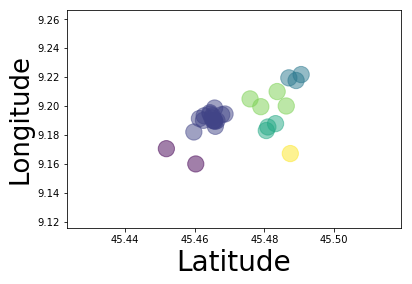

In [240]:
area = np.pi * ( X[:, 1])**2
plt.scatter(X[:, 0], X[:, 1], s=area, c=labels.astype(np.float),
alpha=0.5)
plt.xlabel('Latitude', fontsize=28)
plt.ylabel('Longitude', fontsize=26)
plt.show()
 

In [23]:
latitude = X[:, 0].mean()
longitude = X[:, 1].mean()

In [24]:
# create map and display it
milan_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map Milan
milan_map

In [270]:
from folium import plugins

# let's start again with a clean copy of the map Milan
milan_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(milan_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng in zip(X[:, 0], X[:, 1]):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
milan_map